In [5]:
import sklearn 
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np

data = load_iris().data
target = load_iris().target
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.3)

In [9]:
class NaiveBayes():
  """Naive Bayes Alghorithm"""
  
  def fit(self, X, y):
    self.y_classes, self.y_counts = np.unique(y, return_counts=True)
    self.x_classes = np.array([np.unique(x) for x in X.T])
    self.pi_y = self.y_counts/self.y_counts.sum()
    self.mu = np.array([X[y==k].mean(axis=0) for k in self.y_classes])
    self.var_x = np.array([X[y==k].var(axis=0) for k in self.y_classes])
    return self

  def predict(self, X):
    return np.apply_along_axis(lambda x: self.compute_probs(x), 1, X)

  def compute_probs(self, x):
        probs = np.array([self.compute_prob(x, y) for y in range(len(self.y_classes))])
        return self.y_classes[np.argmax(probs)]
    
  def compute_prob(self, x, y):
        c = 1.0 /np.sqrt(2.0 * np.pi * (self.var_x[y]))
        return np.prod(c * np.exp(-1.0 * np.square(x - self.mu[y]) / (2.0 * self.var_x[y])))
    
  def evaluate(self, X, y):
        return (self.predict(X) == y).mean()
    

In [10]:
NB = NaiveBayes()
history = NB.fit(X_train, y_train)
y_pred = NB.predict(X_test)
y_pred

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


array([2, 1, 2, 0, 1, 0, 1, 1, 2, 2, 0, 0, 1, 1, 2, 0, 0, 0, 2, 1, 0, 0,
       2, 0, 0, 1, 1, 1, 0, 2, 0, 0, 0, 2, 2, 1, 1, 1, 0, 2, 0, 1, 2, 2,
       0])

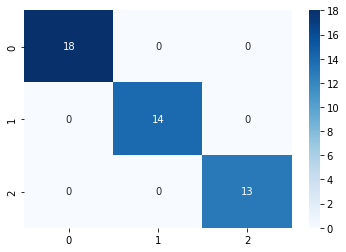

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
accuracy = accuracy_score(y_test,y_pred)
cm= confusion_matrix(y_test,y_pred) 
sns.heatmap(cm, annot=True, cmap='Blues')

In [16]:
print('accuracy:', accuracy)

accuracy: 1.0


We are going to us th KFold method to evaluate our Model

In [48]:
from sklearn.model_selection import KFold
# k = 10

K_Fold = KFold(n_splits=10)
# We are going to use the whole data and target
table= []
for train_index, test_index in K_Fold.split(data):
    X_train, X_test = data[train_index], data[test_index]
    y_train, y_test = target[train_index], target[test_index]
    NB = NaiveBayes()
    history = NB.fit(X_train,y_train)
    y_pred = NB.predict(X_test)
    cm = confusion_matrix(y_test,y_pred)
    accuracy = accuracy_score(y_test,y_pred)
    table.append({"matrice de confusion" : cm, "accuracy":accuracy })

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  
/

In [49]:
for i in range(0, len(table)):
  print(f"Accuracy {i+1}:",table[i]['accuracy'])

Accuracy 1: 1.0
Accuracy 2: 1.0
Accuracy 3: 1.0
Accuracy 4: 0.9333333333333333
Accuracy 5: 0.9333333333333333
Accuracy 6: 0.9333333333333333
Accuracy 7: 1.0
Accuracy 8: 0.8666666666666667
Accuracy 9: 0.8666666666666667
Accuracy 10: 1.0


# **Sckit-learn Library Naïve bayes Algorithm**

In [50]:
from sklearn.naive_bayes import GaussianNB

# k = 10

K_Fold = KFold(n_splits=10)
# We are going to use the whole data and target
table_2= []
for train_index, test_index in K_Fold.split(data):
    X_train, X_test = data[train_index], data[test_index]
    y_train, y_test = target[train_index], target[test_index]
    NB = GaussianNB()
    history = NB.fit(X_train,y_train)
    y_pred = NB.predict(X_test)
    cm = confusion_matrix(y_test,y_pred)
    accuracy = accuracy_score(y_test,y_pred)
    table_2.append({"matrice de confusion" : cm, "accuracy":accuracy })

In [51]:
for i in range(0, len(table_2)):
  print(f"Accuracy {i+1}:",table_2[i]['accuracy'])

Accuracy 1: 1.0
Accuracy 2: 1.0
Accuracy 3: 1.0
Accuracy 4: 0.9333333333333333
Accuracy 5: 0.9333333333333333
Accuracy 6: 0.8666666666666667
Accuracy 7: 1.0
Accuracy 8: 0.8666666666666667
Accuracy 9: 0.8666666666666667
Accuracy 10: 1.0


# Comparing the accuracy results

In [52]:
global_accuracy_for_our_model = 0
for i in range(0, len(table)):
   global_accuracy_for_our_model += table[i]['accuracy']
global_accuracy_for_our_model /= 10

In [53]:
global_accuracy_for_sklearn_model = 0
for i in range(0, len(table_2)):
   global_accuracy_for_sklearn_model += table_2[i]['accuracy']
global_accuracy_for_sklearn_model /= 10

In [54]:
global_accuracy_for_our_model

0.9533333333333335

In [55]:
global_accuracy_for_sklearn_model

0.9466666666666669

Our model give us a better result